In [449]:
"""
Passo a passo:
1) Carregar a imagem desejada (em escala de cinza)
2) Normalizar a imagem (histograma / min-max)
3) Discretização a imagem no range [0-9]
4) Aplicar pixel a pixel o mapping de halftone (conforme figura em anexo) 
5) Salvar a imagem e verificar a qualidade 
6) Compare os resultados obtidos utilizando a imagem original e sua versão com normalização
"""

'\nPasso a passo:\n1) Carregar a imagem desejada (em escala de cinza)\n2) Normalizar a imagem (histograma / min-max)\n3) Discretização a imagem no range [0-9]\n4) Aplicar pixel a pixel o mapping de halftone (conforme figura em anexo) \n5) Salvar a imagem e verificar a qualidade \n6) Compare os resultados obtidos utilizando a imagem original e sua versão com normalização\n'

In [450]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


<H1>FUNCTIONS</H1>

In [451]:
#getMappingArray2D: Receives a level of color (0-9) an return the mapping (3x3 array) correspondent to given level

def getMappingArray2D(colorLevel):
    """
    
    Receives a level of color (int between 0-9) an return the mapping (3x3 np array) correspondent to given level
    I'm using SQUARES instead of circles to fill the mapping
    """
    
    if colorLevel == 0:
        mappingArray = np.array(
            [[0, 0, 0],
            [0, 0, 0], 
            [0, 0, 0]]) #valores pretos ou círculos pretos?
        
        mappingArray = np.array(mappingArray)
        return mappingArray
       
    elif colorLevel == 1:
        mappingArray = [[0, 255, 0],
                        [0, 0, 0], 
                        [0, 0, 0]] 
        
        mappingArray = np.array(mappingArray)
        return mappingArray
                                                
    elif colorLevel == 2:
        mappingArray = [[0, 255, 0],
                        [0, 0, 0], 
                        [0, 0, 255]] 
                
        mappingArray = np.array(mappingArray)
        return mappingArray
        
    elif colorLevel == 3:
        mappingArray = [[255, 255, 0],
                        [0, 0, 0], 
                        [0, 0, 255]] 
        
        mappingArray = np.array(mappingArray)
        return mappingArray
   
    elif colorLevel == 4:
        mappingArray = [[255, 255, 0],
                        [0, 0, 0], 
                        [255, 0, 255]] 

                
        mappingArray = np.array(mappingArray)
        return mappingArray
    
    elif colorLevel == 5:
        mappingArray = [[255, 255, 255],
                        [0, 0, 0], 
                        [255, 0, 255]] 
        
        mappingArray = np.array(mappingArray)
        return mappingArray

    elif colorLevel == 6:
        mappingArray = [[255, 255, 255],
                        [0, 0, 255], 
                        [255, 0, 255]] 
        
        mappingArray = np.array(mappingArray)
        return mappingArray
    
    elif colorLevel == 7:
        mappingArray = [[255, 255, 255],
                        [0, 0, 255], 
                        [255, 255, 255]] 
        
        mappingArray = np.array(mappingArray)
        return mappingArray
    
    elif colorLevel == 8:
        mappingArray = [[255, 255, 255],
                        [255, 0, 255], 
                        [255, 255, 255]] 
        
        mappingArray = np.array(mappingArray)
        return mappingArray
    
    elif colorLevel == 9:
        mappingArray = [[255, 255, 255],
                        [255, 255, 255], 
                        [255, 255, 255]] 
        
        mappingArray = np.array(mappingArray)
        return mappingArray


In [452]:
def detonaHalf(img_array_dis):
    """
    Recebe a img(matrix 2d) em grayscale, já normalizada e discretizada no range 0-9
    Retorna a img em halftone
    
    """
    
    original_array = img_dis #testagem real
    
    #Flattening array
    original_array_flat = original_array.flatten() 
    original_array_flat
    
    #Preparing to create big_array (result image)
    num_elements_big = original_array.size #how many elements
    num_elements_big

    EXPANSION_FACTOR = 3 #the new image will be 3 times bigger
    EXPANSION_FACTOR

    num_rows_big = original_array.shape[0] * EXPANSION_FACTOR #how many rows
    num_rows_big

    num_cols_big = original_array.shape[1] * EXPANSION_FACTOR #how many cols
    num_cols_big

    #Creating big array with specified dimensions
    big_array = np.zeros((num_elements_big, EXPANSION_FACTOR, EXPANSION_FACTOR), dtype=int)

    
    for i in range(num_elements_big):     
        #put the correspondent mapping according value of original matrix
        big_array[i] = getMappingArray2D(original_array_flat[i])
    
    
    #The problem is RIGHT HERE! It is more explained in the below of this file in "Dúvida aqui" section
    image_half= np.reshape(big_array,(num_rows_big, num_cols_big), order='C')
        
    return image_half

In [453]:
def normalize(img):
    """
        Recebe uma imagem em grayscale, equaliza por histograma
        
    """
    img_eq = cv2.equalizeHist(img)
    return img_eq

In [454]:
def discretize09(img):
    """
        Recebe uma imagem e discretiza no range 0-9 (com tipo de dado int)
    """
    f = img
    g = (f - f.min()) / (f.max()-f.min()) * 9
    g #image in range 0-9
    
    #converted and rounded to int to avoid floating values
    img_dis = g.astype(int) 
    return img_dis    

In [455]:
def showHistogram(img):
    plt.hist(img.ravel(),256,[0,256]); plt.show()

In [456]:
def showImageGray(img):
    plt.imshow(img, cmap="gray")

<H1>MAIN CODE</H1>

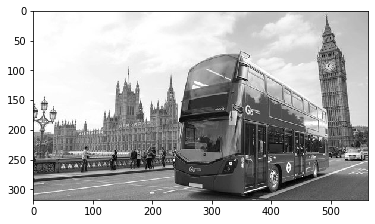

In [467]:
""" #1) Carregar a imagem desejada (em escala de cinza) """

img = cv2.imread("../img/bus_uk.jpg", 0)

showImageGray(img)

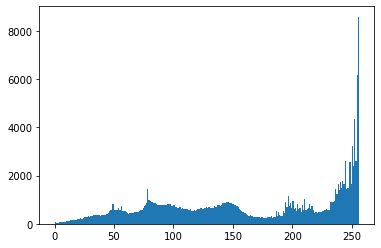

In [458]:
showHistogram(img)

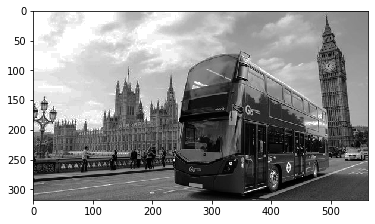

In [459]:
""" #2) Normalizar a imagem (histograma / min-max) """

img_norm = normalize(img)

showImageGray(img_norm)

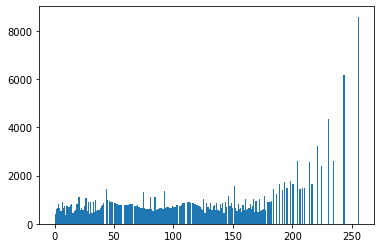

In [460]:
showHistogram(img_norm)

In [461]:
""" #3) Discretização a imagem no range [0-9] """

img_dis = discretize09(img_norm)
img_dis

array([[9, 9, 9, ..., 4, 4, 4],
       [9, 9, 9, ..., 4, 4, 4],
       [9, 9, 9, ..., 4, 4, 4],
       ...,
       [3, 3, 3, ..., 2, 2, 2],
       [3, 3, 3, ..., 1, 1, 1],
       [3, 3, 3, ..., 2, 2, 2]])

In [462]:
""" #4) Aplicar pixel a pixel o mapping de halftone """
img_half = detonaHalf(img_dis)
img_half

array([[255, 255, 255, ...,   0,   0, 255],
       [255,   0, 255, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255,   0, 255],
       ...,
       [255, 255,   0, ...,   0,   0,   0],
       [  0,   0, 255, ...,   0, 255,   0],
       [  0,   0,   0, ...,   0,   0, 255]])

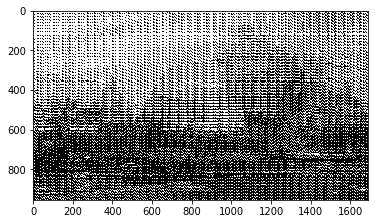

In [463]:
showImageGray(img_half) #the image is distored

<H1>DÚVIDA AQUI</H1>

In [402]:
"""Fazendo um exemplo menor com uma imagem de entrada 2x2.
já fiz um exemmplo com 1x1, que é o caso mais fácil"""

#get original image
original_array = np.ones((2,2),dtype=int)
original_array

array([[1, 1],
       [1, 1]])

In [403]:
#original_array = img_dis #testagem real

In [404]:
#Flattening array
original_array_flat = original_array.flatten() 
original_array_flat

array([1, 1, 1, 1])

In [405]:
#Preparing to create big_array (result image)

num_elements_big = original_array.size #how many elements
num_elements_big

EXPANSION_FACTOR = 3 #the new image will be 3 times bigger
EXPANSION_FACTOR

num_rows_big = original_array.shape[0] * EXPANSION_FACTOR #how many rows
num_rows_big

num_cols_big = original_array.shape[1] * EXPANSION_FACTOR #how many cols
num_cols_big


#Creating big array with specified dimensions
big_array = np.zeros((num_elements_big, EXPANSION_FACTOR, EXPANSION_FACTOR), dtype=int)
big_array

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]])

In [406]:
for i in range(num_elements_big): 
    
    #put the correspondent mapping according value of original matrix
    big_array[i] = getMappingArray2D(original_array_flat[i])

In [407]:
big_array

array([[[  0, 255,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0, 255,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0, 255,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0, 255,   0],
        [  0,   0,   0],
        [  0,   0,   0]]])

In [408]:
#cada elemento é um array 3x3:
big_array[0]

array([[  0, 255,   0],
       [  0,   0,   0],
       [  0,   0,   0]])

In [412]:
#a ideia seria dar um reshape pra ficar como na imagem anexo. Um array 2x2 onde cada elemento seria uma matrix 3x3
big_array

array([[[  0, 255,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0, 255,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0, 255,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0, 255,   0],
        [  0,   0,   0],
        [  0,   0,   0]]])

In [410]:
img_end = np.reshape(big_array,(num_rows_big, num_cols_big), order='C')
img_end #ESSE 255 DA DIREITA DEVIA ESTAR EM CIMA

array([[  0, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255,   0],
       [  0,   0,   0,   0,   0,   0]])

In [ ]:
#esse problema acima causa distorção para exibir a imagem

In [ ]:
"""TENTATIVAS SEM ÊXITO"""

In [251]:
#Testing

big_array.shape

(4, 3, 3)

In [302]:
big_array

array([[[  0, 255,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0, 255,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0, 255,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0, 255,   0],
        [  0,   0,   0],
        [  0,   0,   0]]])

In [253]:
img_end = big_array.reshape(1, num_rows_big, num_cols_big)
img_end

array([[[  0, 255,   0,   0,   0,   0],
        [  0,   0,   0,   0, 255,   0],
        [  0,   0,   0,   0,   0,   0],
        [  0, 255,   0,   0,   0,   0],
        [  0,   0,   0,   0, 255,   0],
        [  0,   0,   0,   0,   0,   0]]])

In [254]:
img_end.shape

(1, 6, 6)

In [255]:
img_end = img_end.reshape(num_rows_big,num_cols_big)
img_end

array([[  0, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255,   0],
       [  0,   0,   0,   0,   0,   0]])

In [256]:
img_end.shape

(6, 6)

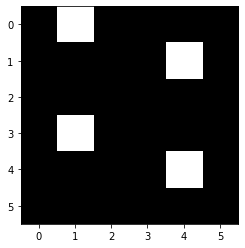

In [257]:
plt.imshow(img_end, cmap="gray")

In [180]:
ravel_img = ravel_img.reshape(1, 36)
ravel_img

array([[  0, 255,   0,   0,   0,   0,   0,   0,   0,   0, 255,   0,   0,
          0,   0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0,
          0,   0, 255,   0,   0,   0,   0,   0,   0,   0]])

In [181]:
ravel_img.shape

(1, 36)

In [187]:
ravel_img = ravel_img.reshape(6,6)

In [190]:
ravel_img.shape

(6, 6)

In [191]:
ravel_img

array([[  0, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255,   0],
       [  0,   0,   0,   0,   0,   0]])

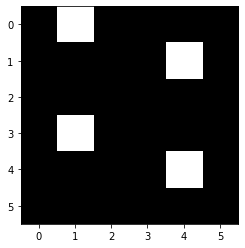

In [228]:
plt.imshow(ravel_img, cmap="gray")